In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
dataFiles = ["$HOME/EIC/output/101.root"]
a = getData(dataFiles)


Processed $HOME/EIC/output/101.root in 58.6 seconds


In [3]:
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d = applyCut(d, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
#d = applyCut(d, '0.05 < x < 0.1', '0.05 < x < 0.1')
d = applyCut(d, '10 < pt_electron < 15', '10 < pt_electron < 15')

d = getDelta(d, 'electron')
d = getDelta(d, 'quark')
d = fixPhi(d, 'photon')
d.eval('pt_ratio = pt_jet/pt_electron', inplace = True)

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.01 < y < 0.85 291288  fraction kept: 95.6
10 < pt_electron < 15 18885  fraction kept: 6.5
Added colomns for variables of electron jet correlation
Added colomns for variables of quark jet correlation
Fixed photon phi range
Fixed photon delta phi range


In [4]:
d1 = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

delta_phi_photon_abs < 0.4 17229  fraction kept: 91.2


In [5]:
def plotRatio1dnvar(txt):
    fig = plt.figure(figsize = (10,8))
    plot1dnvar([d, d1], ['pt_ratio']*2,\
               ['$p_T^{jet} > 4 GeV$',\
                '$p_T^{jet} > 4 GeV$ \n $|\Delta \phi|< 0.4$'],\
               0, 2, 0, 7e6, 0.05, '$p_T^{jet}/p_T^{electron}$', 'linear', txt)

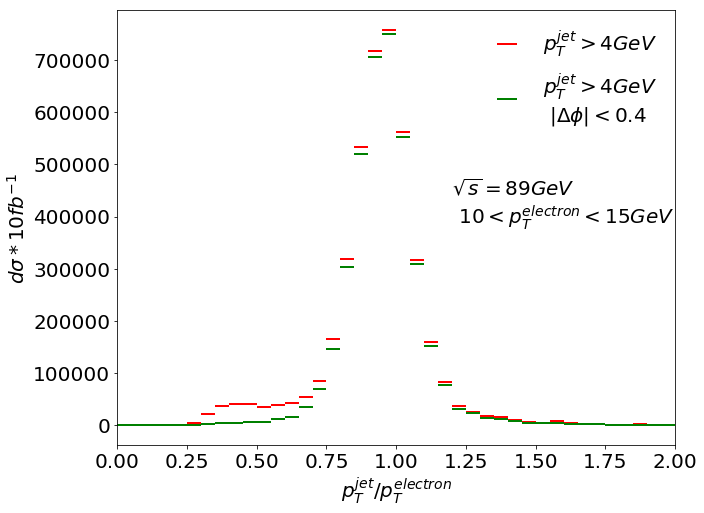

In [10]:
fig = plotRatio1dnvar('pt_ratio')
plt.text(1.2,380000,'$\sqrt{s}=89 GeV$ \n $10 < p_T^{electron} < 15 GeV$', fontsize = 20)
plt.savefig('images/pt_ratio_no_x_cut.pdf', bbox_inches='tight')

In [11]:
b = applyCut(a, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = keepOneJet(b)

0.01 < y < 0.85 24447811  fraction kept: 67.2
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 5207745  fraction kept: 21.3

Remove extra jets 3954404  fraction kept: 75.9


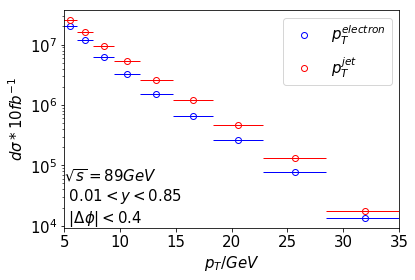

In [12]:
xvar_array = toArrayFloat(0.69, 1.55, 0, log=True, logNum=10)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
    
x1, y1, xerr = getHist(b1, 'pt_electron', xvar_array)
x2, y2, xerr = getHist(b, 'pt_jet', xvar_array)

plt.errorbar(x1, 10*y1*xsec*1e12/ntrials, xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/ntrials, 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/ntrials, xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/ntrials, 'ro', fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T/GeV$', fontsize=15)
plt.ylabel('$d\sigma*10fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=35)
plt.legend(prop={'size': 15}, frameon=True, loc='best')
plt.text(5,1e4,'$\sqrt{s} = 89 GeV$ \n $0.01 < y < 0.85$ \n $|\Delta\phi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_electron_jet.pdf', bbox_inches='tight')

In [13]:
b = applyCut(a, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
b = applyCut(b, 'Q2 > 25', 'Q2 > 25')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = keepOneJet(b)

0.01 < y < 0.85 24447811  fraction kept: 67.2
Q2 > 25 1150592  fraction kept: 4.7
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 346409  fraction kept: 30.1

Remove extra jets 249203  fraction kept: 71.9


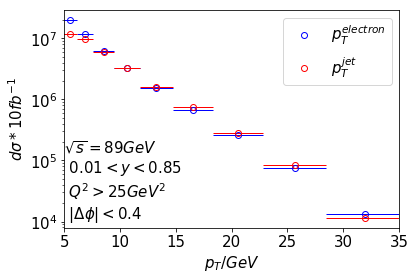

In [14]:
xvar_array = toArrayFloat(0.69, 1.55, 0, log=True, logNum=10)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
    
x1, y1, xerr = getHist(b1, 'pt_electron', xvar_array)
x2, y2, xerr = getHist(b, 'pt_jet', xvar_array)

plt.errorbar(x1, 10*y1*xsec*1e12/ntrials, xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/ntrials, 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/ntrials, xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/ntrials, 'ro', fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T/GeV$', fontsize=15)
plt.ylabel('$d\sigma*10fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=35)
plt.legend(prop={'size': 15}, frameon=True, loc='best')
plt.text(5,1e4,'$\sqrt{s} = 89 GeV$ \n $0.01 < y < 0.85$ \n $Q^2 > 25 GeV^2$ \n $|\Delta\phi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_electron_jet_Q2_25.pdf', bbox_inches='tight')